# Simple Security and Fatigue Score Calculator

This notebook calculates security and fatigue scores for a user-defined configuration vector.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from security_env import SecurityEnv

In [26]:
# Initialize the environment
env = SecurityEnv()
print(f"Number of features: {len(env.feature_names)}")

Feature names: ['Familarity', 'Frequency of Password Changes', 'Difficulty Level Password', 'Effort Required Password', 'Perceived Importance Password', 'Password Uniqueness', 'Frequency of MFA prompts', 'Difficulty Level MFA', 'Effort Required MFA', 'Perceived Importance of MFA', 'Frequency of Security Warnings', 'Difficulty Level Security Warnings', 'Effort Required Security Warnings', 'Perceived Importance of Security Warnings', 'Warnings Response Behaviour', 'Hardware security key (FIDO2 token) or cryptographic device', 'On-device prompt or biometric', 'OTP via authenticator app', 'OTP via SMS/email', 'Secondary email/phone or security questions', 'No MFA enabled']
Number of features: 21


In [27]:
# Display feature names and their indices for reference
print("Available features:")
for i, feature_name in enumerate(env.feature_names):
    feature_type = env.feature_types[feature_name]
    feature_range = env.feature_ranges[feature_name]
    print(f"{i}: {feature_name} ({feature_type}) - Range: {feature_range}")

Available features:
0: Familarity (categorical) - Range: [0, 1, 2]
1: Frequency of Password Changes (categorical) - Range: [1, 2, 3, 4, 5]
2: Difficulty Level Password (categorical) - Range: [1, 2, 3, 4, 5]
3: Effort Required Password (categorical) - Range: [1, 2, 3, 4, 5]
4: Perceived Importance Password (categorical) - Range: [1, 2, 3, 4, 5]
5: Password Uniqueness (categorical) - Range: [0.2, 0.5, 0.8, 1.0]
6: Frequency of MFA prompts (categorical) - Range: [1, 2, 3, 4, 5]
7: Difficulty Level MFA (categorical) - Range: [1, 2, 3, 4, 5]
8: Effort Required MFA (categorical) - Range: [1, 2, 3, 4, 5]
9: Perceived Importance of MFA (categorical) - Range: [1, 2, 3, 4, 5]
10: Frequency of Security Warnings (categorical) - Range: [1, 2, 3, 4, 5]
11: Difficulty Level Security Warnings (categorical) - Range: [1, 2, 3, 4, 5]
12: Effort Required Security Warnings (categorical) - Range: [1, 2, 3, 4, 5]
13: Perceived Importance of Security Warnings (categorical) - Range: [1, 2, 3, 4, 5]
14: Warning

## Calculate Security and Fatigue Scores

Define a simple function to calculate scores for a configuration vector.

In [ ]:
def calculate_scores(config_vector):
    """Calculate security and fatigue scores for a configuration vector."""
    # Convert to numpy array if it's not already
    config = np.array(config_vector)
    
    # Check if the config vector has the correct length
    if len(config) != len(env.feature_names):
        raise ValueError(f"Configuration vector must have length {len(env.feature_names)}")
    
    # Calculate the security score
    security_score = env._compute_security_score(config)
    
    # Calculate the fatigue score
    fatigue_score = env._compute_fatigue_score(config)
    
    # Get the actual feature values
    feature_values = {}
    for i, feature_name in enumerate(env.feature_names):
        value = env._map_action_to_feature_range(config[i], feature_name)
        feature_values[feature_name] = value
    
    return {
        'security_score': security_score,
        'fatigue_score': fatigue_score,
        'feature_values': feature_values
    }

## Define Your Configuration Vector

Enter your configuration vector below. Each value corresponds to a feature index.

In [58]:
# Define your configuration vector here
# Each number is the index for the corresponding feature
my_config = np.array([
    2,  # Familarity

    4,  # Frequency of Password Changes
    4,  # Difficulty Level Password
    4,  # Effort Required Password
    0,  # Perceived Importance Password
    0,  # Password Uniqueness

    4,  # Frequency of MFA prompts
    4,  # Difficulty Level MFA
    4,  # Effort Required MFA
    0,  # Perceived Importance of MFA

    4,  # Frequency of Security Warnings
    4,  # Difficulty Level Security Warnings
    4,  # Effort Required Security Warnings
    0,  # Perceived Importance of Security Warnings
    0,  # Warnings Response Behaviour

    1,  # Hardware security key (FIDO2 token) or cryptographic device
    1,  # On-device prompt or biometric
    1,  # OTP via authenticator app
    1,  # OTP via SMS/email
    1,  # Secondary email/phone or security questions
    0   # No MFA enabled
])

print(f"Configuration vector length: {len(my_config)}")

Configuration vector length: 21


## Calculate and Display Results

Security Score: 20.00 / 100
Fatigue Score: 100.00 / 100


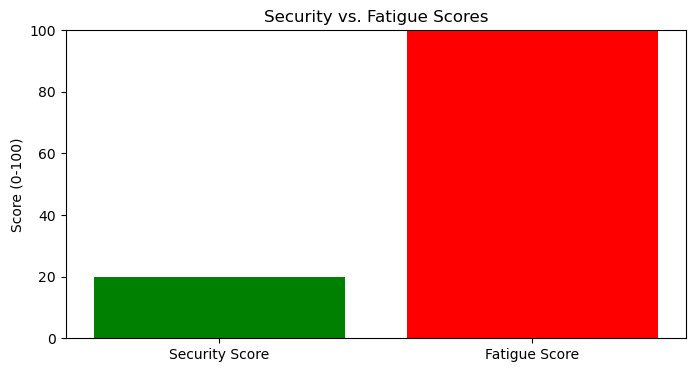


Feature Values:


,Feature,Value
0,Familarity,2.0
1,Frequency of Password Changes,5.0
2,Difficulty Level Password,5.0
3,Effort Required Password,5.0
4,Perceived Importance Password,1.0
5,Password Uniqueness,0.2
6,Frequency of MFA prompts,5.0
7,Difficulty Level MFA,5.0
8,Effort Required MFA,5.0
9,Perceived Importance of MFA,1.0


In [59]:
def analyze_config(config_vector):
    """Calculate and display scores for a configuration vector."""
    try:
        result = calculate_scores(config_vector)
        
        # Print scores
        print(f"Security Score: {result['security_score']:.2f} / 100")
        print(f"Fatigue Score: {result['fatigue_score']:.2f} / 100")
        
        # Create a simple bar chart
        scores = [result['security_score'], result['fatigue_score']]
        labels = ['Security Score', 'Fatigue Score']
        colors = ['green', 'red']
        
        plt.figure(figsize=(8, 4))
        plt.bar(labels, scores, color=colors)
        plt.ylim(0, 100)
        plt.title('Security vs. Fatigue Scores')
        plt.ylabel('Score (0-100)')
        plt.show()
        
        # Display feature values
        print("\nFeature Values:")
        df = pd.DataFrame({
            'Feature': list(result['feature_values'].keys()),
            'Value': list(result['feature_values'].values())
        })
        display(df)
        
        return result
    except Exception as e:
        print(f"Error: {e}")
        return None

# Analyze the configuration
results = analyze_config(my_config)

## Try Different Configuration

You can easily test another configuration by defining a new vector and analyzing it.

In [ ]:
# Example: Define another configuration
another_config = np.array([
    2,  # Familarity - Advanced
    4,  # Frequency of Password Changes - Annually
    4,  # Difficulty Level Password - Very difficult
    1,  # Effort Required Password - Low
    4,  # Perceived Importance Password - High
    3,  # Password Uniqueness - Very unique
    0,  # Frequency of MFA prompts - Daily
    1,  # Difficulty Level MFA - Easy
    1,  # Effort Required MFA - Low
    4,  # Perceived Importance of MFA - High
    2,  # Frequency of Security Warnings - Monthly
    2,  # Difficulty Level Security Warnings - Moderate
    1,  # Effort Required Security Warnings - Low
    4,  # Perceived Importance of Security Warnings - High
    4,  # Warnings Response Behaviour - High response (100)
    1,  # Hardware security key (FIDO2 token) - Enabled
    1,  # On-device prompt or biometric - Enabled
    0,  # OTP via authenticator app - Disabled
    0,  # OTP via SMS/email - Disabled
    0,  # Secondary email/phone or security questions - Disabled
    0   # No MFA enabled - Disabled
])

# Uncomment the line below to analyze this configuration
# another_results = analyze_config(another_config)